In [2]:
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
vix = yf.download("^VIX", start="2006-01-01", end="2020-02-28")
sp500 = yf.download("^GSPC", start="2006-01-01", end=dt.date.today())
world = yf.download("ACWI", start="2006-01-01", end=dt.date.today())

vix.loc[dt.datetime(2020,2,28), "High"] = 48.34 #yfinance skips last value, manual gathering

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


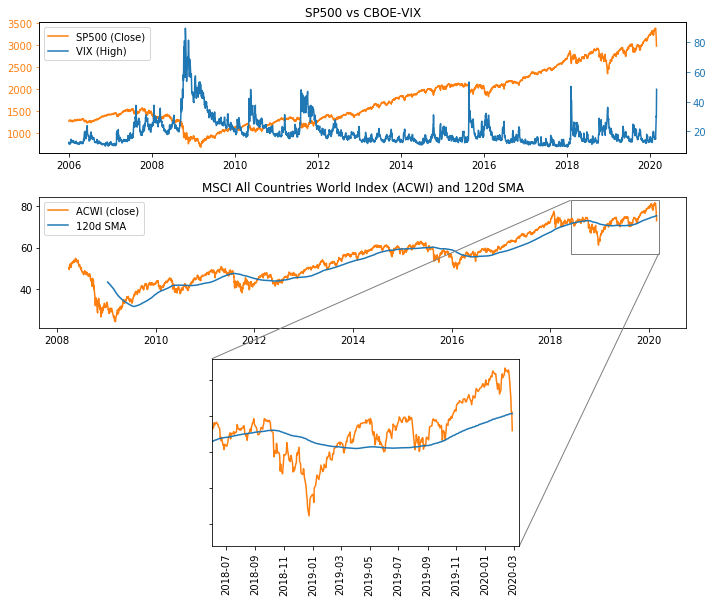

In [5]:
#for those fancy zoom in:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax_lst = plt.subplots(2, 1, figsize=(10,5))

#first graph of first subplot
color = 'tab:orange'
ax_lst[0].set_title("SP500 vs CBOE-VIX")
ax_lst[0].tick_params(axis='y', colors=color)
ax_lst[0].plot(sp500["Close"], color=color, label="SP500 (Close)")

#second graph of first subplot
ax0_bis = ax_lst[0].twinx()
color = 'tab:blue'
ax0_bis.tick_params(axis='y', colors=color)
ax0_bis.plot(vix["High"], color=color, label="VIX (High)")

#all legends in same box for first subplot
lines, labels = ax_lst[0].get_legend_handles_labels()
lines2, labels2 = ax0_bis.get_legend_handles_labels()
ax0_bis.legend(lines + lines2, labels + labels2, loc='upper left')

#first graph of second subplot + inset
ax_lst[1].set_title("MSCI All Countries World Index (ACWI) and 120d SMA")
axins = zoomed_inset_axes(ax_lst[1], 3.5, bbox_to_anchor=(0.75,-0.2), bbox_transform=ax_lst[1].transAxes)

color = 'tab:orange'
ax_lst[1].plot(world["Close"], color=color, label="ACWI (close)")
axins.plot(world["Close"], color=color)

color = 'tab:blue'
ax_lst[1].plot(world["Close"].rolling(window=200).mean(), color=color, label="120d SMA")
axins.plot(world["Close"].rolling(window=200).mean(), color=color)

ax_lst[1].legend(loc='upper left')

#inset tweaking
x1, x2, y1, y2 = dt.date(2018,6,1), dt.date.today()+dt.timedelta(days=14), 57, 83 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.tick_params(axis='y', which='both', labelbottom=True, labelleft=False)
axins.tick_params(axis='x', rotation=90)
mark_inset(ax_lst[1], axins, loc1=2, loc2=4, fc="none", ec="0.5")


fig.tight_layout() #working for spacing subplots, ok with the others incompat axes

In [6]:
vix20 = yf.download("^VIX", start="2000-01-01", end="2020-02-28") #vix 20 years, not downloaded at first avoiding handling plot of large DF
vix20.loc[dt.datetime(2020,2,28), "High"] = 48.34

max_vix = {}
for i in range(10):
    max_vix[vix20['Close'].pct_change(1).drop(max_vix).idxmax()] = vix20['Close'].pct_change(1).drop(max_vix).max()



[*********************100%***********************]  1 of 1 downloaded


In [7]:
max_vix #top 10

{Timestamp('2018-02-05 00:00:00'): 1.1559792027729636,
 Timestamp('2007-02-27 00:00:00'): 0.6421524663677127,
 Timestamp('2011-08-08 00:00:00'): 0.5,
 Timestamp('2016-06-24 00:00:00'): 0.4933333333333334,
 Timestamp('2020-02-24 00:00:00'): 0.46545667447306815,
 Timestamp('2015-08-21 00:00:00'): 0.46447230929989547,
 Timestamp('2017-05-17 00:00:00'): 0.46384976525821586,
 Timestamp('2015-08-24 00:00:00'): 0.4534427399215126,
 Timestamp('2017-08-10 00:00:00'): 0.44374437443744363,
 Timestamp('2018-10-10 00:00:00'): 0.43949843260188093}